In [2]:
# ! pip install yfinance

# 1) 결측치 처리

In [3]:
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")

## 결측치 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
import missingno as msno

<Axes: >

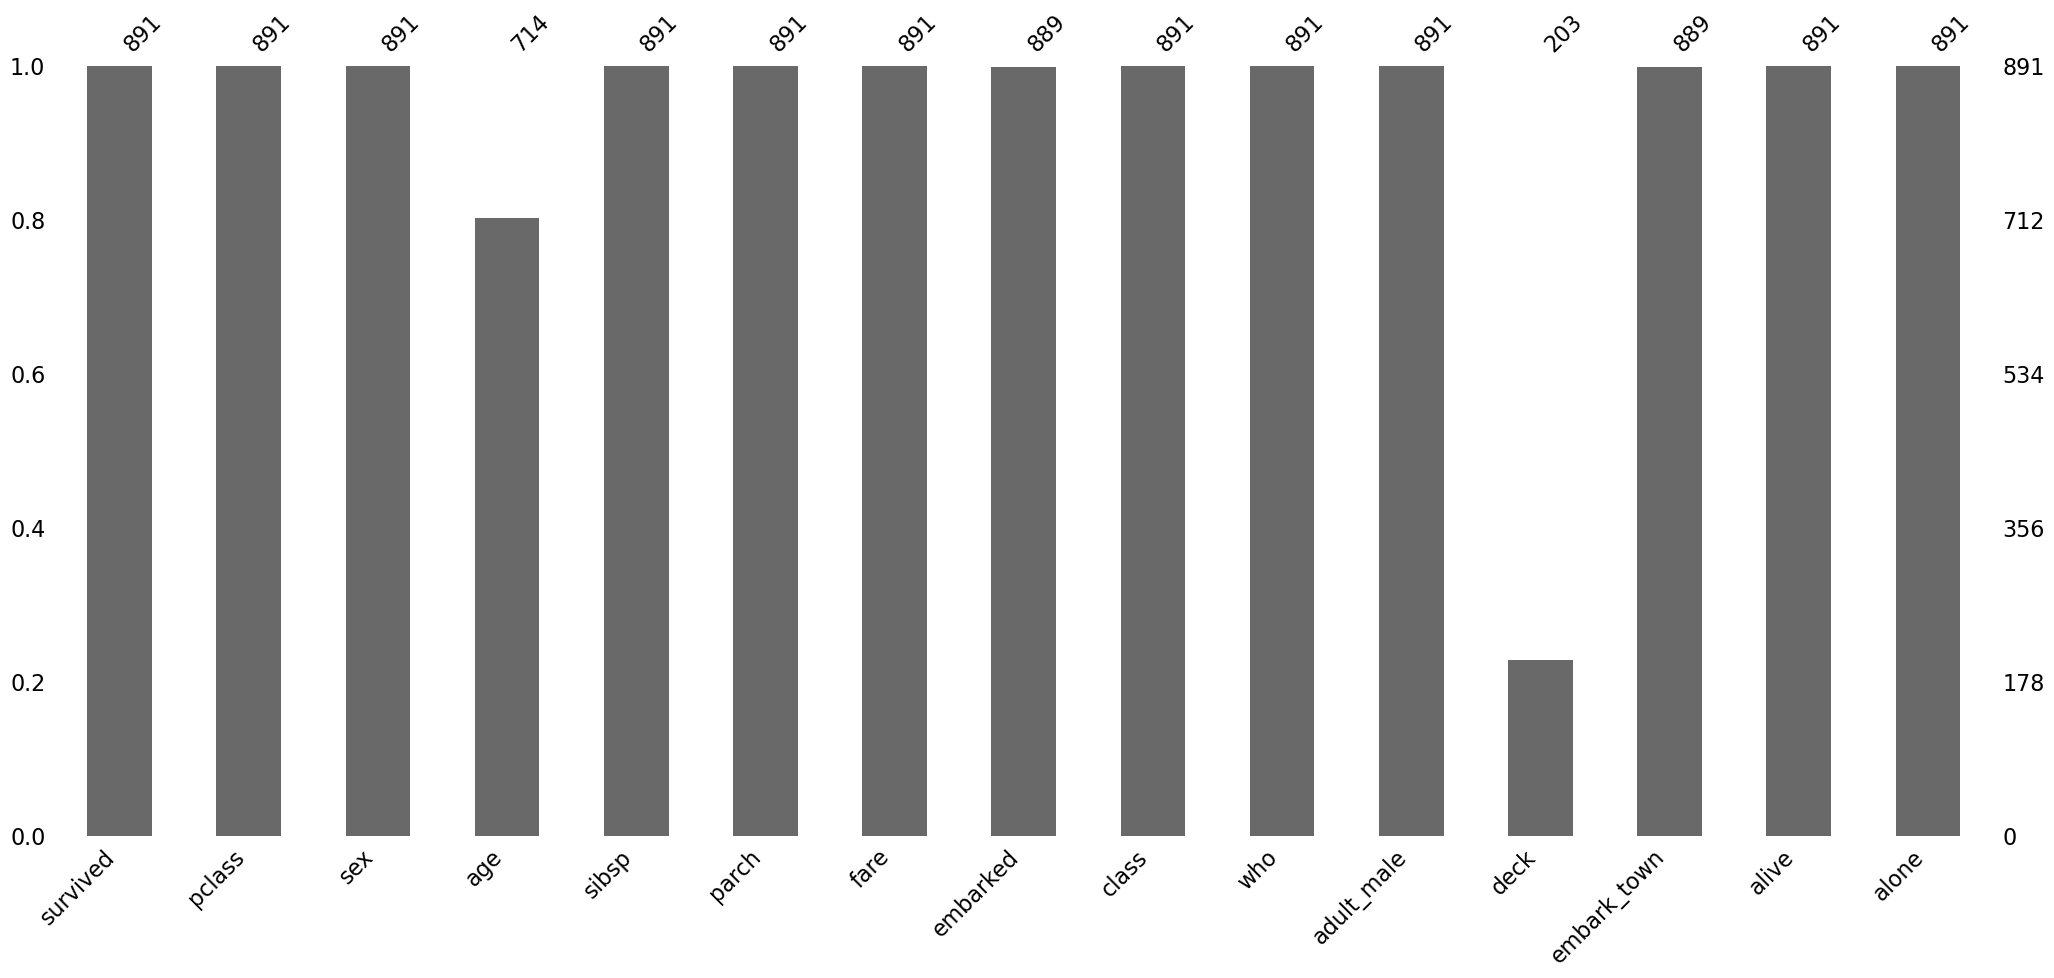

In [7]:
msno.bar(df)

## 결측치 처리

### 삭제

#### Listwise Deletion / Dropping Entire Rows(행 제거) 

In [8]:
df.dropna(axis=0)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


#### Dropping Entire Columns (열 제거)

In [9]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


#### pandas.DataFrame.dropna() 더 알아보기

In [10]:
df.dropna(axis=0, how='any')  # 해당 행이나 열에 결측치가 하나라도 있다면 제거. (default)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [60]:
df.dropna(axis=0, how='all')  # 해당 행이나 열의 '모든 값'이 결측치라면 제거.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [61]:
df.dropna(axis=1, thresh=800)  # 결측치가 아닌 값이 thresh보다 적게 있을 때 제거. how와 함께 사용 불가.

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [62]:
df.dropna(axis=0, subset=['age'])  # 고려해야할 다른 축의 레이블 (ex. 행을 삭제하는 경우엔 열 지정.)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [68]:
df.dropna(axis=0, ignore_index=True)  # True로 지정할 경우 결측치가 제거된 DataFrame의  index가 reset됨.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
178,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
179,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
180,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [11]:
df.dropna(axis=0, ignore_index=True, inplace=True)  # True로 지정할 경우 해당 DataFrame 의 값이 변경됨.

In [12]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
178,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
179,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
180,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [13]:
df = sns.load_dataset("titanic")  # 데이터 프레임이 변경되었으니 다시 가져오기. 

# 연습문제1

In [11]:
# 해당 데이터셋의 컬럼별 결측치의 개수를 확인하는 코드를 작성하세요. (힌트: isna)
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# 행에 결측치가 하나라도 있으면 그 행을 전부 삭제하는 코드를 작성하세요.
# index 는 reset 시켜주세요. (힌트: ignore_index)
df.dropna(axis=0, how='any', ignore_index=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
178,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
179,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
180,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [16]:
# 열에 결측치가 하나라도 있으면 그 열을 전부 삭제하는 코드를 작성하세요. 
df.dropna(axis=1, how='any')

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [18]:
# age와 deck에 결측치가 있는 행을 제거해주세요. 
df.dropna(axis=0, subset=['age', 'deck']).isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

### IMPUTATIONS(대치)

In [19]:
df = sns.load_dataset("titanic")

#### Imputing with a constant (상수 처리)

In [20]:
new_df = df.copy()

In [21]:
new_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [22]:
new_df['age'] = new_df['age'].fillna(0)

In [23]:
new_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,0.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Imputing with a constant (상수 처리2)

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
new_df = df.copy()
new_df = new_df[['age']]  # 기존 new_df 데이터 프레임에서 'age' 열만 선택하여 새로운 데이터 프레임 new_df 생성. 
new_df

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [53]:
# 결측값을 처리하기 위한 SimpleImputer 객체 constant_imputer를 생성합니다. 
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
# strategy='constant'는 결측값을 상수 값으로 대체하겠다는 것을 의미하고, fill_value=0은 그 상수 값을 0으로 설정합니다.

# scikit learn에서 'fit_transform'의 의미: Fit to data, then transform it. (데이터에 맞추고, 변환하라.)
new_df.loc[:,:] = constant_imputer.fit_transform(new_df)
# fit: new_df에 대해 필요한 변환 계산 (여기서는 결측값의 위치 파악)
# transform: 결측값 대체.

new_df

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,0.0
889,26.0


#### Imputing with Mean, Median, Mode/Common value (평균 대체)

In [26]:
new_df = df.copy()

In [27]:
new_df['age'].mean()

29.69911764705882

In [28]:
new_df['age'] = new_df['age'].fillna(new_df['age'].mean())

In [29]:
new_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Imputing with Mean, Median, Mode/Common value (평균 대체2)

In [30]:
new_df = df.copy()
new_df = new_df[['age']]  # 기존 new_df 데이터 프레임에서 'age' 열만 선택하여 새로운 데이터 프레임 new_df 생성. 
new_df

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [31]:
# 결측값을 처리하기 위한 SimpleImputer 객체 constant_imputer를 생성합니다. 
constant_imputer = SimpleImputer(strategy='mean')
# strategy='mean'은 결측값을 mean 값으로 대체하겠다는 것을 의미. (mean, median, most_frequent, constant 중 택 1)

# scikit learn에서 'fit_transform'의 의미: Fit to data, then transform it. (데이터에 맞추고, 변환하라.)
new_df.loc[:,:] = constant_imputer.fit_transform(new_df)
# fit: new_df에 대해 필요한 변환 계산 (여기서는 결측값의 위치 파악)
# transform: 결측값 대체.

new_df

,age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


# 연습문제2

In [32]:
df = sns.load_dataset("titanic")

In [34]:
new_df = df.copy()

In [35]:
# 연습문제
# 'age' 의 median 값으로 결측치를 채워주세요.
new_df['age'].fillna(new_df['age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [39]:
# 연습문제
# deck의 최빈값(mode())값으로 결측치를 채워주세요.
# 단, DataFrame의 mode()의 경우 데이터프레임의 형태로 결과를 반환합니다.
# 따라서 fillna 함수에 사용하기 위해서는 반환된 값 중 첫 번째 값을 선택해야 합니다(mode()[0]).
new_df['deck'].fillna(new_df['deck'].mode()[0])

0      C
1      C
2      C
3      C
4      C
      ..
886    C
887    B
888    C
889    C
890    C
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [42]:
df['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [43]:
new_df['deck'].fillna(new_df['deck'].mode()[0]).value_counts()

deck
C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: count, dtype: int64

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

0      C
1      C
2      C
3      C
4      C
      ..
886    C
887    B
888    C
889    C
890    C
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [62]:
# 위 과정을 SimpleImputer을 이용해 한 번 더 수행해보세요. (선택)

#### forward fill

In [ ]:
! pip install yfinance

In [44]:
import yfinance as yf

In [45]:
import pandas as pd

In [46]:
df1 = yf.download( '005930.KS', '2023-03-01','2024-03-01')  # 종목코드(삼성전자), 시작일자, 종료일자

[*********************100%%**********************]  1 of 1 completed


* "Open" (시가), "High" (고가), "Low" (저가), "Close" (종가), "Volume" (거래량) 

In [47]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-02,60900.0,61800.0,60500.0,60800.0,59554.882812,13095682
2023-03-03,61000.0,61200.0,60500.0,60500.0,59261.027344,10711405
2023-03-06,61100.0,61600.0,60800.0,61500.0,60240.550781,13630602
2023-03-07,61400.0,61400.0,60700.0,60700.0,59456.933594,11473280
2023-03-08,60100.0,60500.0,59900.0,60300.0,59065.128906,14161857
...,...,...,...,...,...,...
2024-02-23,73600.0,74200.0,72900.0,72900.0,72900.000000,16225166
2024-02-26,72300.0,73200.0,72200.0,72800.0,72800.000000,14669352
2024-02-27,73100.0,73400.0,72700.0,72900.0,72900.000000,13201981


In [48]:
df2 = yf.download( '035420.KS', '2023-03-01','2024-03-01')   # 종목코드(네이버), 시작일자, 종료일자

[*********************100%%**********************]  1 of 1 completed


In [49]:
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-02,207500.0,209500.0,205000.0,206000.0,204783.921875,817689
2023-03-03,207500.0,210500.0,205500.0,205500.0,204286.875000,729689
2023-03-06,208500.0,214500.0,208500.0,214500.0,213233.750000,1052243
2023-03-07,214000.0,214500.0,210500.0,211000.0,209754.406250,640146
2023-03-08,208500.0,209000.0,202000.0,202500.0,201304.578125,1027023
...,...,...,...,...,...,...
2024-02-23,202500.0,203000.0,200000.0,200500.0,200500.000000,731357
2024-02-26,200000.0,201500.0,199500.0,199900.0,199900.000000,630834
2024-02-27,199900.0,200500.0,198700.0,200000.0,200000.000000,650795


In [50]:
df3 = yf.download( '035720.KS', '2023-03-01','2024-03-01')   # 종목코드(카카오), 시작일자, 종료일자

[*********************100%%**********************]  1 of 1 completed


In [51]:
df3

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-02,62200.0,62400.0,60800.0,61200.0,61134.273438,1842975
2023-03-03,61600.0,62200.0,60900.0,61000.0,60934.488281,1250945
2023-03-06,61200.0,63800.0,61100.0,63600.0,63531.695312,2768767
2023-03-07,63000.0,63100.0,61400.0,61500.0,61433.953125,2322926
2023-03-08,61200.0,61200.0,59000.0,59100.0,59036.527344,2935338
...,...,...,...,...,...,...
2024-02-23,58100.0,58200.0,56600.0,57100.0,57038.675781,1330016
2024-02-26,57500.0,58000.0,57000.0,57100.0,57038.675781,871467
2024-02-27,57200.0,57700.0,56300.0,56800.0,56739.000000,1022628


In [52]:
# 각 데이터프레임에서 'High'와 'Volume' 컬럼만 선택하고, 컬럼명 변경
df1_selected = df1[['High', 'Volume']].rename(columns={'High': 'High_samsung', 'Volume': 'Volume_samsung'})
df2_selected = df2[['High', 'Volume']].rename(columns={'High': 'High_naver', 'Volume': 'Volume_naver'})
df3_selected = df3[['High', 'Volume']].rename(columns={'High': 'High_kakao', 'Volume': 'Volume_kakao'})

In [53]:
import pandas as pd

In [54]:
# 인덱스를 기준으로 세 데이터 프레임 합치기
df_merged = pd.concat([df1_selected, df2_selected, df3_selected], axis=1)

In [55]:
df_merged

,High_samsung,Volume_samsung,High_naver,Volume_naver,High_kakao,Volume_kakao
Date,,,,,,
2023-03-02,61800.0,13095682,209500.0,817689,62400.0,1842975
2023-03-03,61200.0,10711405,210500.0,729689,62200.0,1250945
2023-03-06,61600.0,13630602,214500.0,1052243,63800.0,2768767
2023-03-07,61400.0,11473280,214500.0,640146,63100.0,2322926
2023-03-08,60500.0,14161857,209000.0,1027023,61200.0,2935338
...,...,...,...,...,...,...
2024-02-23,74200.0,16225166,203000.0,731357,58200.0,1330016
2024-02-26,73200.0,14669352,201500.0,630834,58000.0,871467
2024-02-27,73400.0,13201981,200500.0,650795,57700.0,1022628


In [104]:
# df_merged.to_csv("yf.csv")

In [105]:
# df_merged = pd.read_csv("yf.csv", index_col=0)

In [56]:
df_merged.index = pd.to_datetime(df_merged.index)

In [57]:
import numpy as np

In [58]:
np.random.seed(0)  # 재현 가능성을 위해 랜덤 시드 고정

# 모든 컬럼에 대해 30%의 값들을 랜덤으로 선택하여 NaN으로 설정
for column in df_merged.columns:
    # 결측치로 만들 인덱스를 랜덤 선택
    idxs = np.random.choice(df_merged.index, size=int(len(df_merged) * 0.3), replace=False)
    df_merged.loc[idxs, column] = np.nan

df_merged

,High_samsung,Volume_samsung,High_naver,Volume_naver,High_kakao,Volume_kakao
Date,,,,,,
2023-03-02,61800.0,13095682.0,209500.0,817689.0,NaN,NaN
2023-03-03,61200.0,NaN,210500.0,729689.0,62200.0,1250945.0
2023-03-06,61600.0,13630602.0,NaN,1052243.0,63800.0,2768767.0
2023-03-07,61400.0,NaN,214500.0,NaN,63100.0,NaN
2023-03-08,60500.0,14161857.0,209000.0,1027023.0,61200.0,NaN
...,...,...,...,...,...,...
2024-02-23,74200.0,NaN,NaN,731357.0,58200.0,NaN
2024-02-26,73200.0,14669352.0,201500.0,630834.0,NaN,871467.0
2024-02-27,73400.0,13201981.0,200500.0,650795.0,57700.0,NaN


In [59]:
# np.random.choice(모집단, random으로 추출할 표본의 size, 복원추출여부(똑같은 값을 또 뽑을 수 있는지 여부))
np.random.choice(df_merged.index, size=int(len(df_merged) * 0.3), replace=False)

array(['2023-03-10T00:00:00.000000000', '2023-08-14T00:00:00.000000000',
       '2023-12-05T00:00:00.000000000', '2023-11-06T00:00:00.000000000',
       '2023-07-14T00:00:00.000000000', '2023-05-10T00:00:00.000000000',
       '2023-08-03T00:00:00.000000000', '2023-12-28T00:00:00.000000000',
       '2023-06-02T00:00:00.000000000', '2023-03-21T00:00:00.000000000',
       '2023-09-06T00:00:00.000000000', '2024-02-02T00:00:00.000000000',
       '2024-02-16T00:00:00.000000000', '2023-03-30T00:00:00.000000000',
       '2023-10-06T00:00:00.000000000', '2024-01-24T00:00:00.000000000',
       '2023-03-31T00:00:00.000000000', '2023-09-15T00:00:00.000000000',
       '2023-05-25T00:00:00.000000000', '2023-03-28T00:00:00.000000000',
       '2023-11-29T00:00:00.000000000', '2023-12-20T00:00:00.000000000',
       '2024-02-05T00:00:00.000000000', '2023-11-13T00:00:00.000000000',
       '2023-11-30T00:00:00.000000000', '2023-07-25T00:00:00.000000000',
       '2023-11-15T00:00:00.000000000', '2023-04-06

In [60]:
df_merged.isnull().sum()

High_samsung      73
Volume_samsung    73
High_naver        73
Volume_naver      73
High_kakao        73
Volume_kakao      73
dtype: int64

In [61]:
df_merged

,High_samsung,Volume_samsung,High_naver,Volume_naver,High_kakao,Volume_kakao
Date,,,,,,
2023-03-02,61800.0,13095682.0,209500.0,817689.0,NaN,NaN
2023-03-03,61200.0,NaN,210500.0,729689.0,62200.0,1250945.0
2023-03-06,61600.0,13630602.0,NaN,1052243.0,63800.0,2768767.0
2023-03-07,61400.0,NaN,214500.0,NaN,63100.0,NaN
2023-03-08,60500.0,14161857.0,209000.0,1027023.0,61200.0,NaN
...,...,...,...,...,...,...
2024-02-23,74200.0,NaN,NaN,731357.0,58200.0,NaN
2024-02-26,73200.0,14669352.0,201500.0,630834.0,NaN,871467.0
2024-02-27,73400.0,13201981.0,200500.0,650795.0,57700.0,NaN


In [62]:
df_merged.fillna(method='ffill')

/var/folders/d9/60kqyqnj66d6n_1mchz7ph280000gn/T/ipykernel_1287/23622164.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill')


,High_samsung,Volume_samsung,High_naver,Volume_naver,High_kakao,Volume_kakao
Date,,,,,,
2023-03-02,61800.0,13095682.0,209500.0,817689.0,NaN,NaN
2023-03-03,61200.0,13095682.0,210500.0,729689.0,62200.0,1250945.0
2023-03-06,61600.0,13630602.0,210500.0,1052243.0,63800.0,2768767.0
2023-03-07,61400.0,13630602.0,214500.0,1052243.0,63100.0,2768767.0
2023-03-08,60500.0,14161857.0,209000.0,1027023.0,61200.0,2768767.0
...,...,...,...,...,...,...
2024-02-23,74200.0,15208934.0,204500.0,731357.0,58200.0,972001.0
2024-02-26,73200.0,14669352.0,201500.0,630834.0,58200.0,871467.0
2024-02-27,73400.0,13201981.0,200500.0,650795.0,57700.0,871467.0


In [113]:
df_merged.ffill()

,High_samsung,Volume_samsung,High_naver,Volume_naver,High_kakao,Volume_kakao
Date,,,,,,
2023-03-02,61800.0,13095682.0,209500.0,817689.0,NaN,NaN
2023-03-03,61200.0,13095682.0,210500.0,729689.0,62200.0,1250945.0
2023-03-06,61600.0,13630602.0,210500.0,1052243.0,63800.0,2768767.0
2023-03-07,61400.0,13630602.0,214500.0,1052243.0,63100.0,2768767.0
2023-03-08,60500.0,14161857.0,209000.0,1027023.0,61200.0,2768767.0
...,...,...,...,...,...,...
2024-02-23,74200.0,15208934.0,204500.0,731357.0,58200.0,972001.0
2024-02-26,73200.0,14669352.0,201500.0,630834.0,58200.0,871467.0
2024-02-27,73400.0,13201981.0,200500.0,650795.0,57700.0,871467.0


#### backward fill

In [63]:
df_merged.bfill()

,High_samsung,Volume_samsung,High_naver,Volume_naver,High_kakao,Volume_kakao
Date,,,,,,
2023-03-02,61800.0,13095682.0,209500.0,817689.0,62200.0,1250945.0
2023-03-03,61200.0,13630602.0,210500.0,729689.0,62200.0,1250945.0
2023-03-06,61600.0,13630602.0,214500.0,1052243.0,63800.0,2768767.0
2023-03-07,61400.0,14161857.0,214500.0,1027023.0,63100.0,1949722.0
2023-03-08,60500.0,14161857.0,209000.0,1027023.0,61200.0,1949722.0
...,...,...,...,...,...,...
2024-02-23,74200.0,14669352.0,201500.0,731357.0,58200.0,871467.0
2024-02-26,73200.0,14669352.0,201500.0,630834.0,57700.0,871467.0
2024-02-27,73400.0,13201981.0,200500.0,650795.0,57700.0,1463434.0


In [64]:
df_merged.fillna(method='ffill').fillna(method='bfill')

/var/folders/d9/60kqyqnj66d6n_1mchz7ph280000gn/T/ipykernel_1287/4212153482.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill').fillna(method='bfill')


,High_samsung,Volume_samsung,High_naver,Volume_naver,High_kakao,Volume_kakao
Date,,,,,,
2023-03-02,61800.0,13095682.0,209500.0,817689.0,62200.0,1250945.0
2023-03-03,61200.0,13095682.0,210500.0,729689.0,62200.0,1250945.0
2023-03-06,61600.0,13630602.0,210500.0,1052243.0,63800.0,2768767.0
2023-03-07,61400.0,13630602.0,214500.0,1052243.0,63100.0,2768767.0
2023-03-08,60500.0,14161857.0,209000.0,1027023.0,61200.0,2768767.0
...,...,...,...,...,...,...
2024-02-23,74200.0,15208934.0,204500.0,731357.0,58200.0,972001.0
2024-02-26,73200.0,14669352.0,201500.0,630834.0,58200.0,871467.0
2024-02-27,73400.0,13201981.0,200500.0,650795.0,57700.0,871467.0


#### interpolation(보간법)

In [115]:
df_merged.interpolate(method='linear')

,High_samsung,Volume_samsung,High_naver,Volume_naver,High_kakao,Volume_kakao
Date,,,,,,
2023-03-02,61800.0,13095682.0,209500.0,817689.0,NaN,NaN
2023-03-03,61200.0,13363142.0,210500.0,729689.0,62200.0,1250945.0
2023-03-06,61600.0,13630602.0,212500.0,1052243.0,63800.0,2768767.0
2023-03-07,61400.0,13896229.5,214500.0,1039633.0,63100.0,2495752.0
2023-03-08,60500.0,14161857.0,209000.0,1027023.0,61200.0,2222737.0
...,...,...,...,...,...,...
2024-02-23,74200.0,14939143.0,203000.0,731357.0,58200.0,921734.0
2024-02-26,73200.0,14669352.0,201500.0,630834.0,57950.0,871467.0
2024-02-27,73400.0,13201981.0,200500.0,650795.0,57700.0,1167450.5


In [9]:
import matplotlib.pyplot as plt

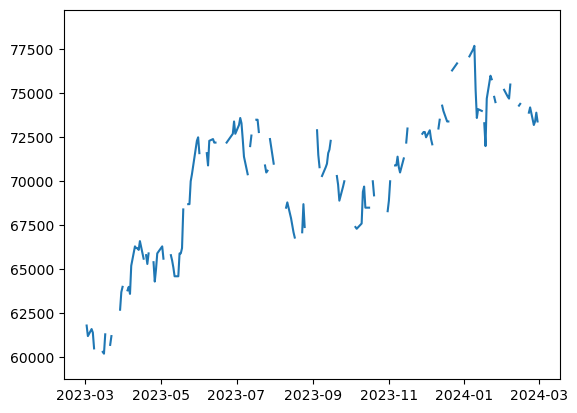

In [66]:
plt.plot(df_merged['High_samsung'])

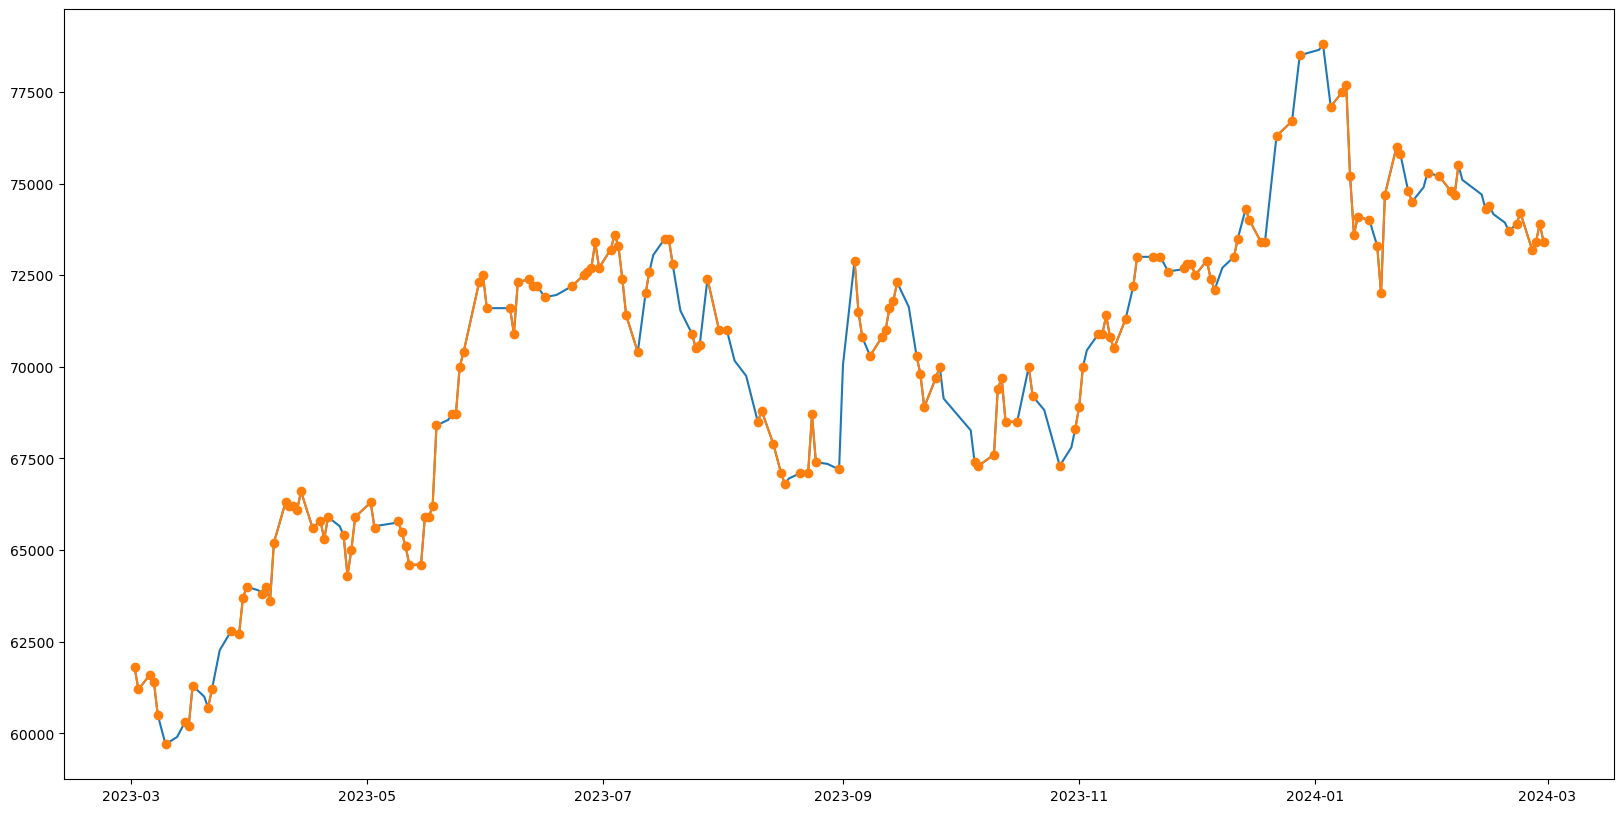

In [67]:
plt.figure(figsize=(20,10))

plt.plot(df_merged['High_samsung'].interpolate(method='linear'))
plt.plot(df_merged['High_samsung'], marker='o')

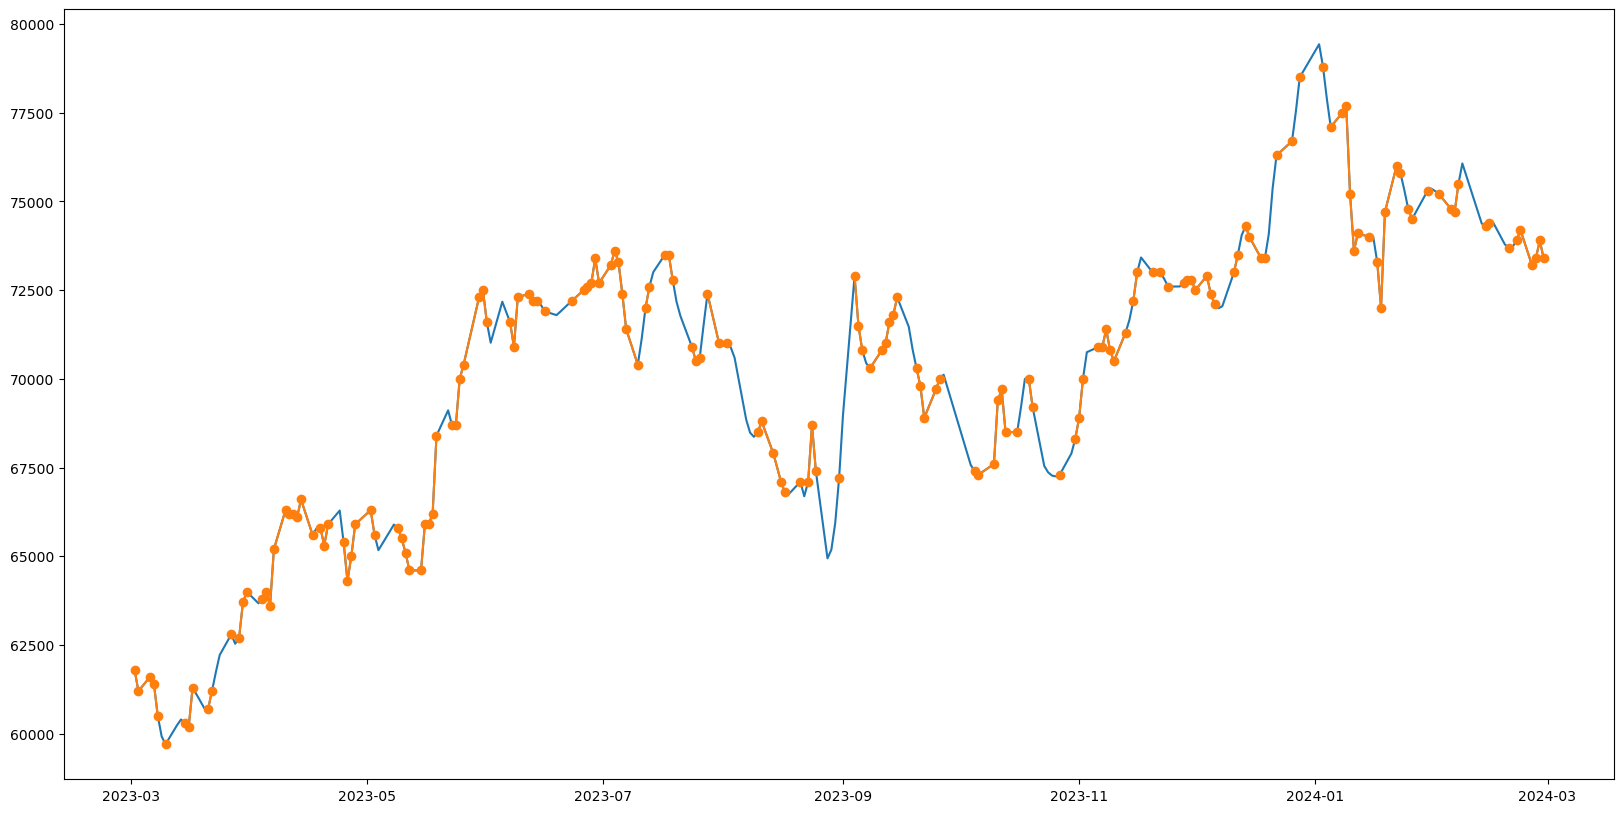

In [69]:
plt.figure(figsize=(20,10))
plt.plot(df_merged['High_samsung'].interpolate(method='spline', order=2))
plt.plot(df_merged['High_samsung'], marker='o')

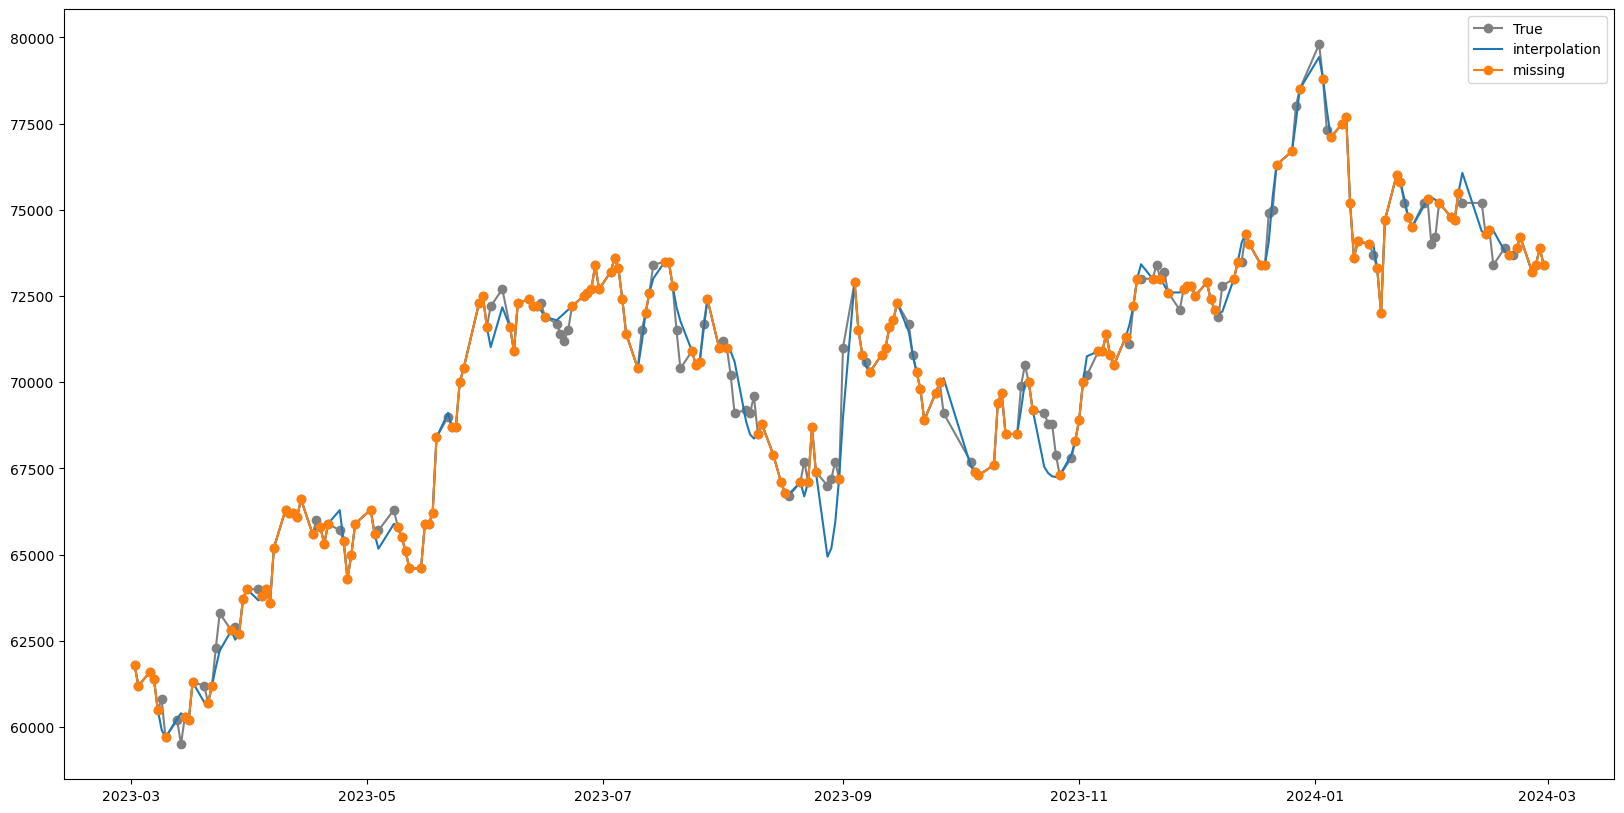

In [70]:
plt.figure(figsize=(20,10))
plt.plot(df1_selected['High_samsung'], marker='o', c='gray', label ='True')
plt.plot(df_merged['High_samsung'].interpolate(method='spline', order=2), label='interpolation')
plt.plot(df_merged['High_samsung'], marker='o', label='missing')
plt.legend()

# 2) 이상치 처리

<Axes: >

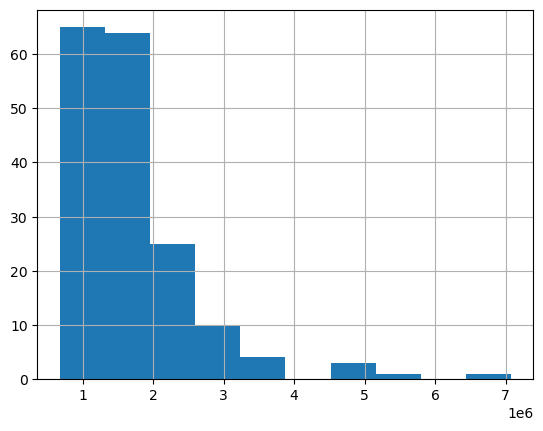

In [71]:
df_merged['Volume_kakao'].hist()

## z-score 기반 이상치 확인

In [72]:
# 컬럼 선택
data = df_merged['Volume_naver']

# 평균과 표준편차 계산
mean = np.mean(data)
std_dev = np.std(data)

# 각 데이터 포인트에 대한 Z-score 계산
z_scores = [(x - mean) / std_dev for x in data]

# Z-score의 절댓값이 3 이상인 데이터 포인트를 이상치로 판별
outliers = [data[i] for i in range(len(z_scores)) if abs(z_scores[i]) > 3]

print("이상치:", outliers)

이상치: [2725703.0, 3102468.0, 3013711.0, 2072800.0]


/var/folders/d9/60kqyqnj66d6n_1mchz7ph280000gn/T/ipykernel_1287/1915693653.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  outliers = [data[i] for i in range(len(z_scores)) if abs(z_scores[i]) > 3]


In [261]:
df_merged['Volume_naver_z_score'] = z_scores

In [262]:
df_merged

,High_samsung,Volume_samsung,High_naver,Volume_naver,High_kakao,Volume_kakao,Volume_kakao_z_score,Volume_naver_z_score
Date,,,,,,,,
2023-03-02,61800.0,13095682.0,209500.0,817689.0,62400.0,1842975.0,0.102229,0.091418
2023-03-03,61200.0,10711405.0,210500.0,729689.0,62200.0,1250945.0,-0.480566,-0.113025
2023-03-06,61600.0,13630602.0,214500.0,1052243.0,63800.0,2768767.0,1.013579,0.636338
2023-03-07,61400.0,11473280.0,214500.0,NaN,63100.0,NaN,NaN,NaN
2023-03-08,60500.0,14161857.0,209000.0,1027023.0,61200.0,NaN,NaN,0.577746
...,...,...,...,...,...,...,...,...
2024-02-23,74200.0,16225166.0,203000.0,731357.0,58200.0,NaN,NaN,-0.109150
2024-02-26,73200.0,14669352.0,201500.0,630834.0,58000.0,871467.0,-0.854124,-0.342686
2024-02-27,73400.0,13201981.0,200500.0,650795.0,57700.0,1022628.0,-0.705321,-0.296313


In [263]:
abs(df_merged['Volume_naver_z_score']).sort_values(ascending=False)

Date
2023-08-01    5.399453
2023-08-24    5.193251
2023-07-31    4.524146
2023-08-04    4.142958
2023-08-25    3.007312
                ...   
2023-10-05         NaN
2023-12-08         NaN
2024-01-03         NaN
2024-01-18         NaN
2024-02-28         NaN
Name: Volume_naver_z_score, Length: 246, dtype: float64

## z-score 기반 이상치 확인2

In [275]:
from scipy.stats import zscore
df_merged['Volume_kakao_z_score'] = zscore(df_merged['Volume_kakao'], nan_policy='omit')

In [278]:
df_merged

,High_samsung,Volume_samsung,High_naver,Volume_naver,High_kakao,Volume_kakao,Volume_kakao_z_score,Volume_naver_z_score
Date,,,,,,,,
2023-03-02,61800.0,13095682.0,209500.0,817689.0,62400.0,1842975.0,0.102229,0.091418
2023-03-03,61200.0,10711405.0,210500.0,729689.0,62200.0,1250945.0,-0.480566,-0.113025
2023-03-06,61600.0,13630602.0,214500.0,1052243.0,63800.0,2768767.0,1.013579,0.636338
2023-03-07,61400.0,11473280.0,214500.0,NaN,63100.0,NaN,NaN,NaN
2023-03-08,60500.0,14161857.0,209000.0,1027023.0,61200.0,NaN,NaN,0.577746
...,...,...,...,...,...,...,...,...
2024-02-23,74200.0,16225166.0,203000.0,731357.0,58200.0,NaN,NaN,-0.109150
2024-02-26,73200.0,14669352.0,201500.0,630834.0,58000.0,871467.0,-0.854124,-0.342686
2024-02-27,73400.0,13201981.0,200500.0,650795.0,57700.0,1022628.0,-0.705321,-0.296313


## boxplot 분석

In [5]:
df = sns.load_dataset("titanic")

In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
plt.hist(df['age'].dropna())

NameError: name 'plt' is not defined

In [8]:
plt.boxplot(df['age'].dropna())
plt.xlabel('age')
plt.show()

NameError: name 'plt' is not defined

## IQR 방법

In [295]:
# 1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

# IQR 계산
IQR = Q3 - Q1

# 하한과 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 필터링
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

print("이상치를 포함하는 행:\n")
outliers

이상치를 포함하는 행:



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
456,0,1,male,65.0,0,0,26.5500,S,First,man,True,E,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False


## 이상치 탐지 모델 사용

In [27]:
from sklearn.ensemble import IsolationForest

In [28]:
df = sns.load_dataset("titanic")

In [29]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [30]:
# IsolationForest 모델 생성
# contamination 파라미터는 데이터셋에서 이상치로 예상되는 데이터의 비율. 
# 이 예제에서는 0.1로 설정. 적절한 값을 설정하는 것이 중요.
clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
clf.fit(df[['pclass', 'fare']].values.reshape(-1, 2))

IsolationForest(contamination=0.1, random_state=42)

In [31]:
# # 'age' 열을 2차원 배열로 변경하여 모델에 적합
outliers_pred = clf.predict(df[['pclass', 'fare']].values.reshape(-1, 2))

In [32]:
# 이상치 탐지 (-1은 이상치, 1은 정상 데이터를 의미)
outliers_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [33]:
# 결과를 데이터 프레임에 추가
df['outlier'] = outliers_pred

# 이상치 출력
outliers = df[df['outlier'] == -1]

print("이상치:\n")
outliers

이상치:



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,outlier
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False,-1
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False,-1
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False,-1
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False,-1
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1,3,male,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True,-1
846,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False,-1
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False,-1
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False,-1


Text(0, 0.5, 'fare')

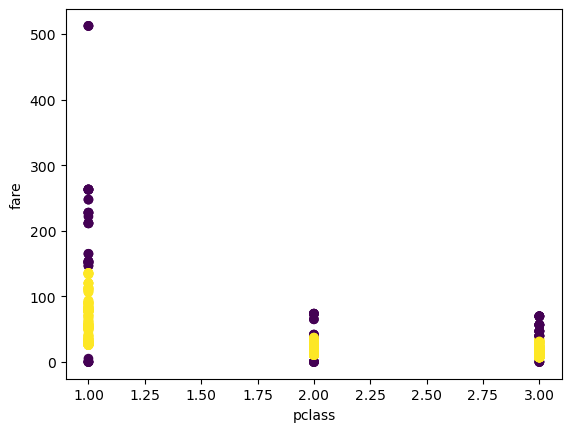

In [39]:
import matplotlib.pyplot as plt

plt.scatter(df['pclass'], df['fare'], c=df['outlier'])  # 보라색이 이상치(-1)
plt.xlabel('pclass')
plt.ylabel('fare')